In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 确保你已经下载了必要的nltk数据
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
def tokenize(sentence):
    return nltk.word_tokenize(sentence)

In [9]:
def calculate_scores(references, candidates):
    bleu_scores = []
    meteor_scores = []

    for ref, cand in zip(references, candidates):
        ref_tokens = tokenize(ref)
        cand_tokens = tokenize(cand)
        bleu = sentence_bleu([ref_tokens], cand_tokens)
        meteor = meteor_score([ref_tokens], cand_tokens)
        bleu_scores.append(bleu)
        meteor_scores.append(meteor)

    return bleu_scores, meteor_scores


In [10]:
# 示例参考句子和候选句子
references = [
    "This is the first reference sentence",
    "This is the second reference sentence",
    "This is the third reference sentence"
]

candidates = [
    "This is the first test sentence",
    "This is the second test sentence",
    "This is the third test sentence"
]

In [11]:
# 计算分数
bleu_scores, meteor_scores = calculate_scores(references, candidates)

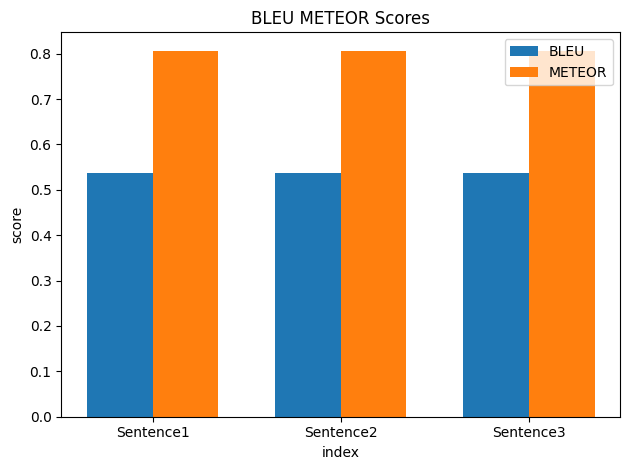

In [13]:
# 可视化结果
x = np.arange(len(references))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bleu_scores, width, label='BLEU')
rects2 = ax.bar(x + width/2, meteor_scores, width, label='METEOR')

ax.set_xlabel('index')
ax.set_ylabel('score')
ax.set_title('BLEU METEOR Scores')
ax.set_xticks(x)
ax.set_xticklabels([f'Sentence{i+1}' for i in range(len(references))])
ax.legend()

fig.tight_layout()
plt.show()